In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

from warnings import filterwarnings
filterwarnings(action = 'ignore')

### Description about the dataset
a.) This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005.

A data frame with 1250 observations on the following 9 variables.

__Year__: The year that the observation was recorded

__Lag1__: Percentage return for previous day

__Lag2__: Percentage return for 2 days previous

__Lag3__: Percentage return for 3 days previous

__Lag4__: Percentage return for 4 days previous

__Lag5__: Percentage return for 5 days previous

__Volume__: Volume of shares traded (number of daily shares traded in billions)

__Today__: Percentage return for today

__Direction__: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day

In [235]:
market_df = pd.read_csv(r"D:\PythonProgram\DataScience Programs\SelfPracticeDatasets\Smarket.csv", sep = ",")
market_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [236]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [237]:
market_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [238]:
market_df['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

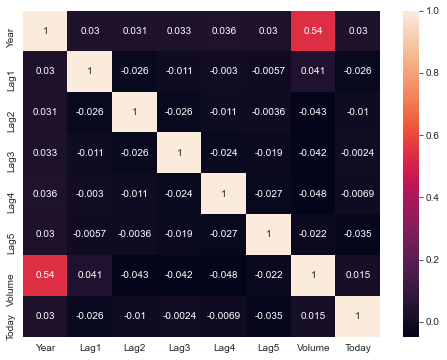

In [239]:
import seaborn as sb
plt.figure(figsize = (8, 6))
plt.tight_layout()
sb.heatmap(market_df.corr(), annot = True, )
plt.show()

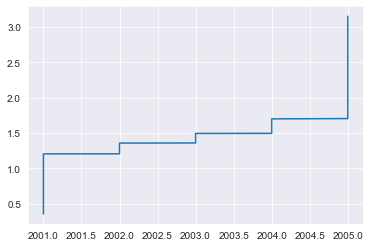

In [240]:
plt.plot(sorted(market_df['Year']), sorted(market_df['Volume']))
plt.show()

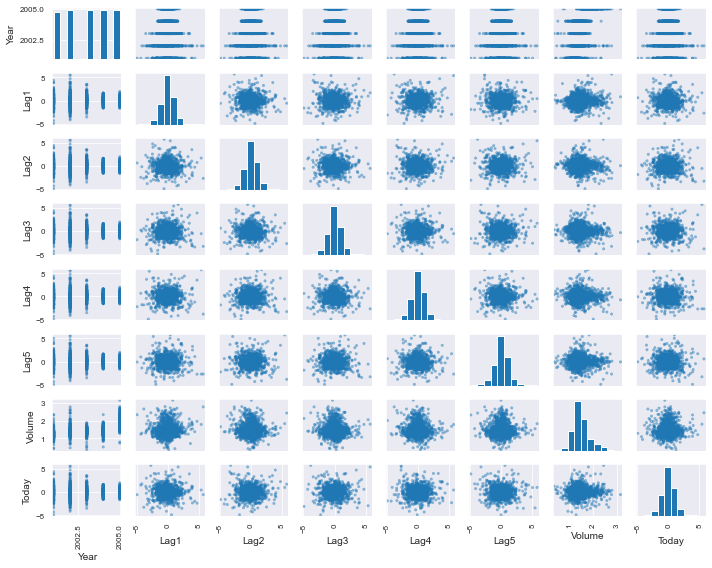

In [241]:
pd.plotting.scatter_matrix(market_df, figsize= (10, 8))
plt.tight_layout()
plt.show()

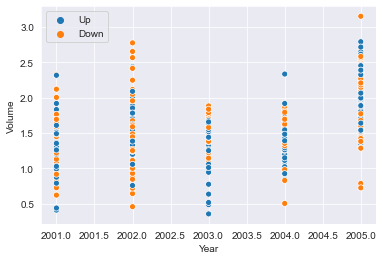

In [242]:
sb.scatterplot(x = market_df['Year'], y = market_df['Volume'], hue = market_df['Direction'].tolist())
plt.show()

In [243]:
market_df_grp = market_df.groupby(by = 'Year').mean().reset_index()
market_df_grp

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,2001,-0.036843,-0.039025,-0.052657,-0.058719,-0.037930,1.226950,-0.043025
1,2002,-0.096845,-0.097321,-0.088282,-0.085397,-0.083310,1.428451,-0.092226
2,2003,0.098079,0.099833,0.088552,0.086631,0.085179,1.384693,0.098698
3,2004,0.037956,0.037980,0.042929,0.040762,0.041754,1.424159,0.036611
4,2005,0.015210,0.016425,0.015881,0.022508,0.020627,1.917298,0.013802


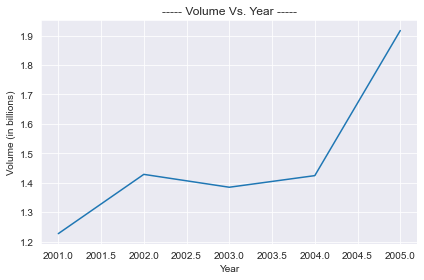

In [244]:
plt.grid('grey')
plt.xlabel('Year')
plt.ylabel('Volume (in billions)')
plt.plot(market_df_grp['Year'], market_df_grp['Volume'])
plt.title('----- Volume Vs. Year -----')
plt.tight_layout()
plt.show()

#### Observation(s):
a.) From this plot __Year Vs. Volume__ we infer that overall as Year increases the number of daily shares traded increases<br>
b.) There is also a sharp increase that can be observed in the Volume within a year span i.e. from year __2004__ to __2005__


In [245]:
market_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


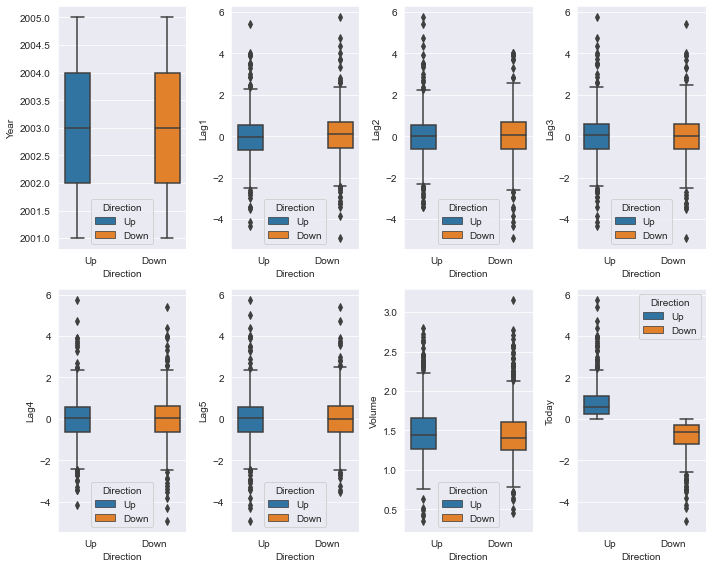

In [246]:
def BoxPlot(columns = None, target = None, data= None):
    plt.figure(figsize = (10, 8))
    
    for fig_num, column in enumerate(columns):
        plt.subplot(2, 4, fig_num+1)
        sb.set_style('darkgrid')
        sb.boxplot(x = target, y = column, data = data, hue = target)
        plt.tight_layout()
        
    plt.show()
        
BoxPlot(columns = market_df.columns[:-1], target = market_df['Direction'], data = market_df)

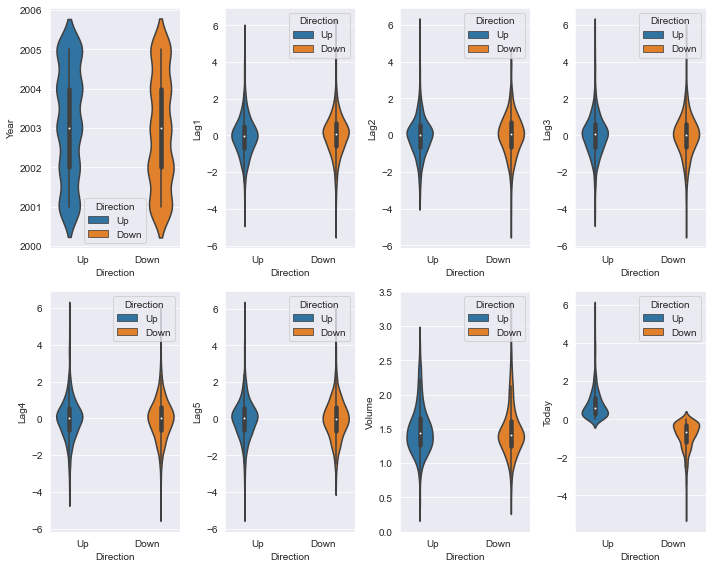

In [247]:
def ViolinPlot(columns = None, target = None, data= None):
    plt.figure(figsize = (10, 8))
    
    for fig_num, column in enumerate(columns):
        plt.subplot(2, 4, fig_num+1)
        sb.set_style('darkgrid')
        sb.violinplot(x = target, y = column, data = data, hue = target)
        plt.tight_layout()
        
    plt.show()
        
ViolinPlot(columns = market_df.columns[:-1], target = market_df['Direction'], data = market_df)

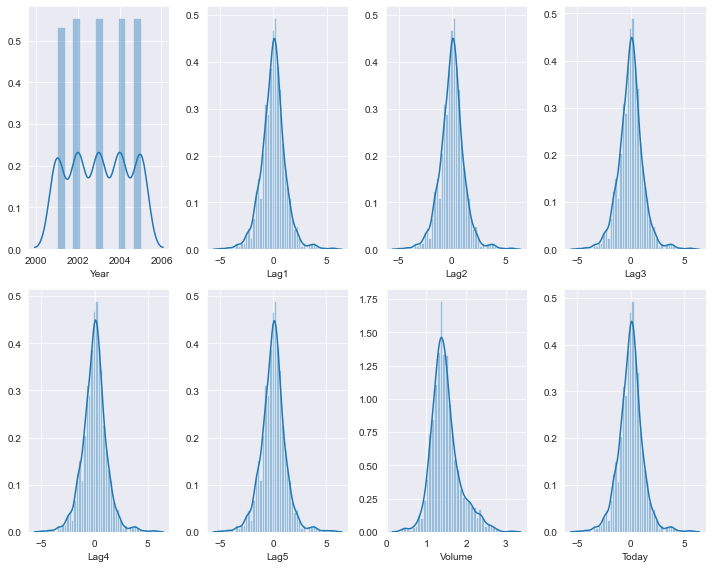

In [248]:
def get_me_the_histogram(columns = None):
    plt.figure(figsize = (10, 8))
    
    for fig_num, column in enumerate(columns):
        plt.subplot(2, 4, fig_num+1)
        sb.distplot(market_df[column])
        plt.tight_layout()
        
    plt.show()
    
get_me_the_histogram(market_df.columns[:-1])

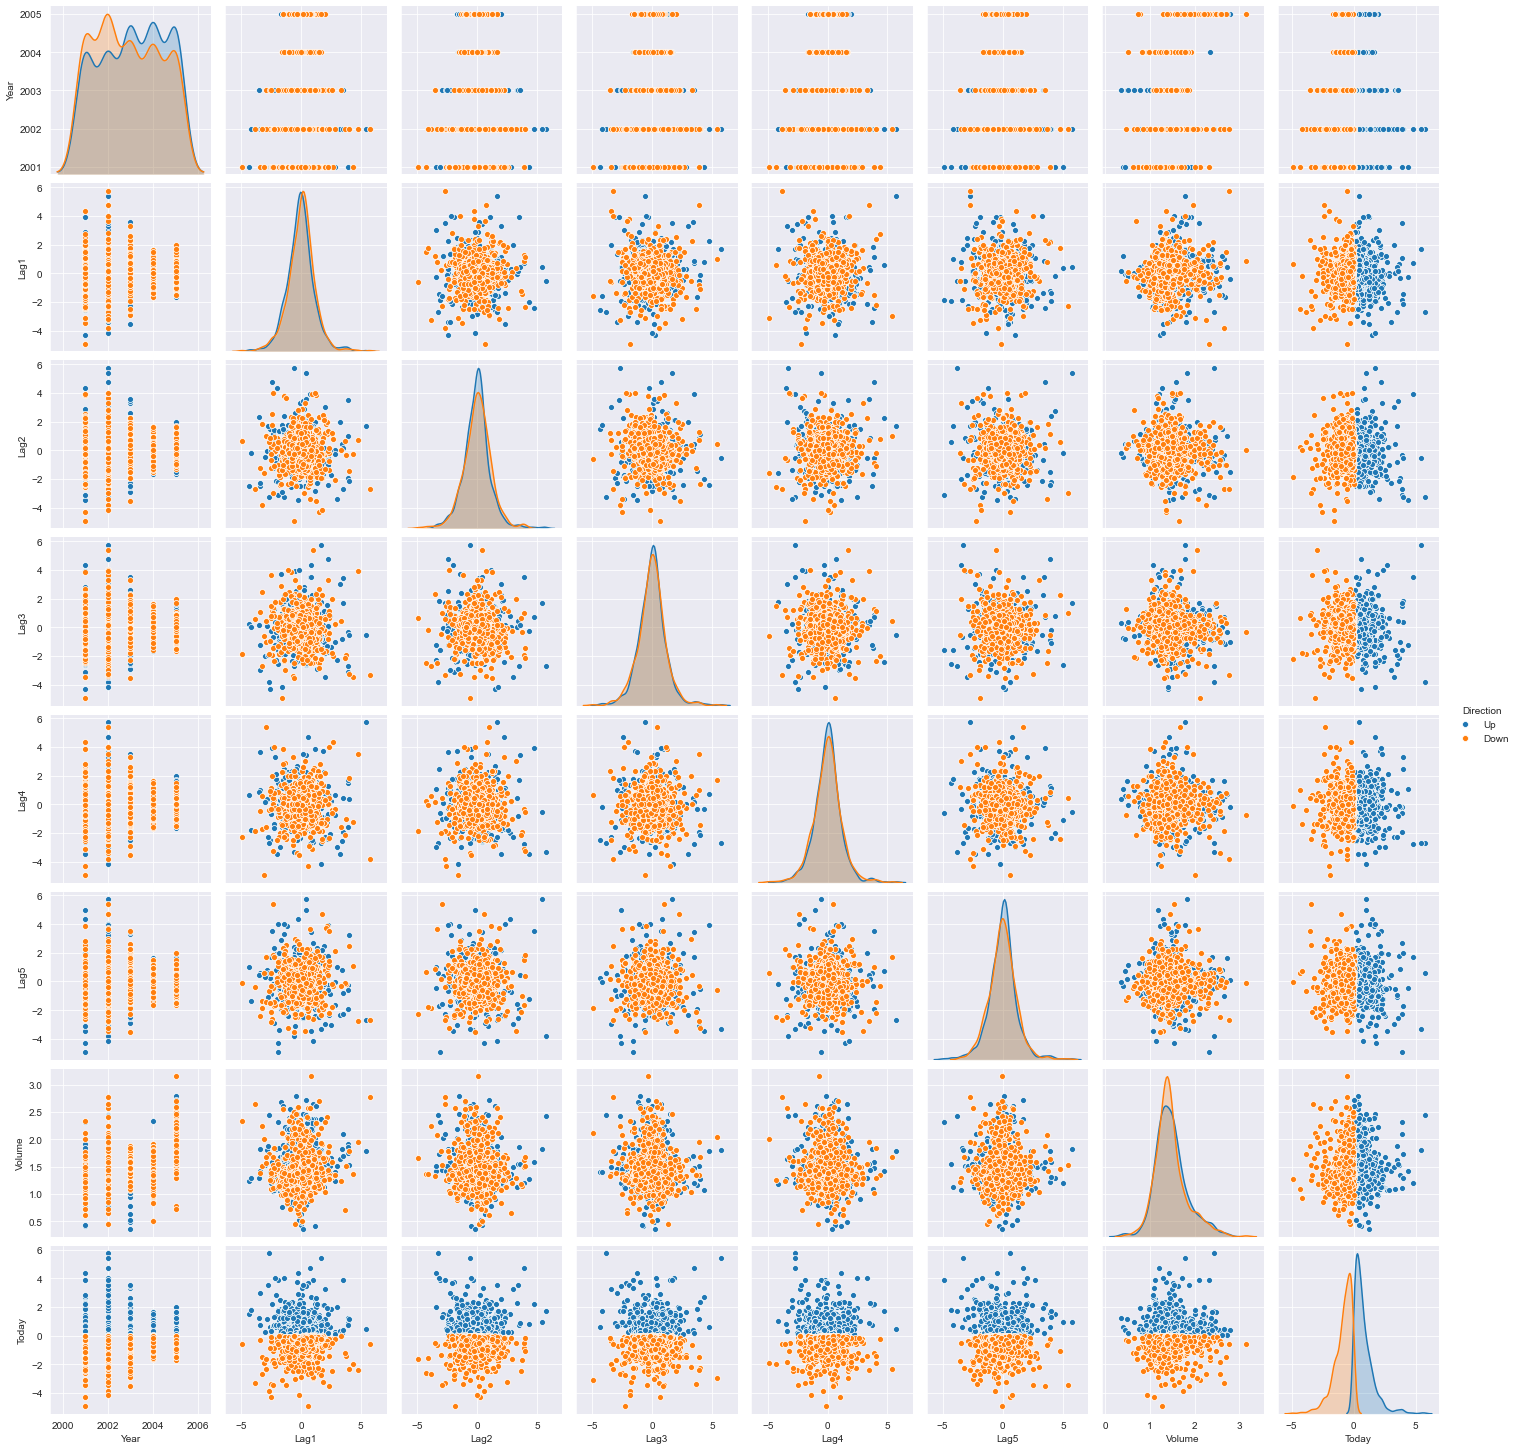

In [249]:
sb.pairplot(data = market_df, hue = 'Direction')
plt.show()

In [250]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [251]:
OrdEnc = OrdinalEncoder()

X = market_df.drop(labels = ['Direction'], axis = 1)
y = market_df['Direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

OrdEnc.fit(np.array(y_train).reshape(len(y_train), 1))
y_train = OrdEnc.transform(np.array(y_train).reshape(len(y_train), 1))
y_test = OrdEnc.transform(np.array(y_test).reshape(len(y_test), 1))


In [252]:
print("Train Data:")
print(X_train.shape)
print(y_train.shape)
print("-" *20)
print("Test Data:")
print(X_test.shape)
print(y_test.shape)

Train Data:
(1000, 8)
(1000, 1)
--------------------
Test Data:
(250, 8)
(250, 1)


In [253]:
LR = LogisticRegression(n_jobs = -1, solver = 'liblinear', random_state= 42)
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)

#### Assessing how the model performed on the Training data

In [254]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

def ConfusionMatrix(Y_true, Y_predicted):
    conf_mat = confusion_matrix(y_train, y_train_pred, normalize= 'true')
    sb.heatmap(conf_mat, annot= True, cmap= 'Greens')
    plt.title("Confusion Matrix")
    plt.show()
    
def get_performance_score(Y_true, Y_predicted, perf_scoring):
    """
    perf_scoring can be any of the following (plesae be advices the scoring are just at basic level !): 
    a.) 'recall'
    b.) 'precision'
    c.) 'f1_score'
    
    """
    
    if perf_scoring == 'recall':
        return "Recall: {}".format(recall_score(Y_true, Y_predicted))
    
    elif perf_scoring == 'precision':
        return "Precision: {}".format(precision_score(Y_true, Y_predicted))
    
    elif perf_scoring == 'f1_score':
        return "f1-score: {}".format(f1_score(Y_true, Y_predicted))
    

def plot_roc_auc_curve(Y_true, Y_score):
    tpr, fpr, threshold = roc_curve(Y_true, Y_score)
    sb.set_style('darkgrid')
    plt.plot(tpr, fpr, label = "Logistic Regression [AUC: {}]".format(round(roc_auc_score(Y_true, Y_score), 4)))
    plt.plot([0.0, 1.0], [0.0,1.0], 'r--', label = "No Information Line")
    plt.title('ROC AUC Curve')
    plt.xlabel('FPR (1- Specificity)')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.show()


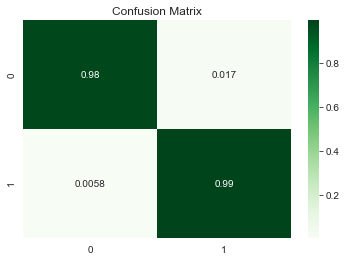

In [255]:
ConfusionMatrix(y_train, y_train_pred)

In [256]:
for metric in ['precision', 'recall', 'f1_score']:
    print(get_performance_score(y_train, y_train_pred, perf_scoring= metric))

Precision: 0.9847036328871893
Recall: 0.9942084942084942
f1-score: 0.9894332372718541


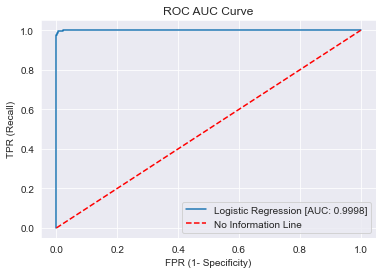

In [257]:
y_train_score = LR.decision_function(X_train)
plot_roc_auc_curve(y_train, y_train_score)

#### Lets check the performance of the model on Cross Validation data using Cross_val_score

In [258]:
cross_val_score(estimator = LR, X = X_train, y= y_train, cv = 5, n_jobs = -1, scoring = 'f1')

array([0.98550725, 0.99521531, 0.97652582, 0.99516908, 0.98564593])

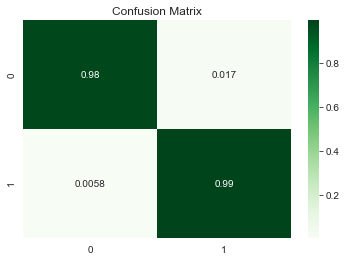

In [259]:
y_test_pred = LR.predict(X_test)
ConfusionMatrix(y_test, y_cv_pred)

In [260]:
for metric in ['precision', 'recall', 'f1_score']:
    print(get_performance_score(Y_true = y_test, Y_predicted = y_test_pred, perf_scoring = metric))

Precision: 1.0
Recall: 0.9923076923076923
f1-score: 0.9961389961389961


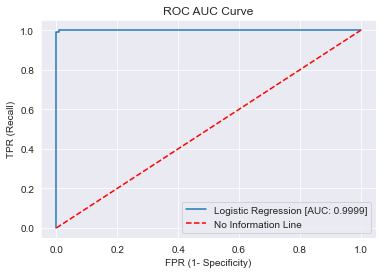

In [261]:
y_test_score = LR.decision_function(X_test)
plot_roc_auc_curve(y_test, y_test_score)